In [1]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import ticker


In [2]:
path = "/home/jorge/tsunami-warning/dataset/series_mapa/"
file = path+'layer04E390/layer04E390.nc'
f=Dataset(file,'r')

In [3]:
for i in f.variables:
    print(i,f.variables[i].units,f.variables[i].shape)

lon degrees (432,)
lat degrees (176,)
grid_lon degrees (432,)
grid_lat degrees (176,)
original_bathy meters (176, 432)
deformed_bathy meters (176, 432)
time seconds since 1970-01-01 (18,)
max_height meters (176, 432)
max_mom_flux meters^3/seconds^2 (176, 432)
eta meters (18, 176, 432)
ux meters/second (18, 176, 432)
uy meters/second (18, 176, 432)
mom_flux_x meters^3/seconds^2 (18, 176, 432)
mom_flux_y meters^3/seconds^2 (18, 176, 432)


In [4]:
len(f.variables['eta'])

18

In [5]:
#print f.variables.keys()
lon=f.variables['lon'][:]
lat=f.variables['lat'][:]
eta = f.variables['eta'][0]
nx=eta.shape[1]
ny=eta.shape[0]
print ('dimensiones')
print ('nx = '+str(nx))
print ('ny = '+str(ny))
bat=f.variables['deformed_bathy'][:]

dimensiones
nx = 432
ny = 176


### Vizualizar series mapa de inundación.
Se generan los mapas de cada instante, las imagenes resultantes se almacenan en la carpeta contenedora del .nc,
es por esto recomendable tener una carpeta para cada .nc o simulación.

/home/jorge/anaconda3/envs/machinelearning/lib/python3.7/site-packages/matplotlib/contour.py:1520: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/home/jorge/anaconda3/envs/machinelearning/lib/python3.7/site-packages/matplotlib/contour.py:1521: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/home/jorge/anaconda3/envs/machinelearning/lib/python3.7/site-packages/matplotlib/contour.py:1169: RuntimeWarning: invalid value encountered in less
  under = np.nonzero(lev < self.zmin)[0]
/home/jorge/anaconda3/envs/machinelearning/lib/python3.7/site-packages/matplotlib/contour.py:1171: RuntimeWarning: invalid value encountered in greater
  over = np.nonzero(lev > self.zmax)[0]
/home/jorge/anaconda3/envs/machinelearning/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


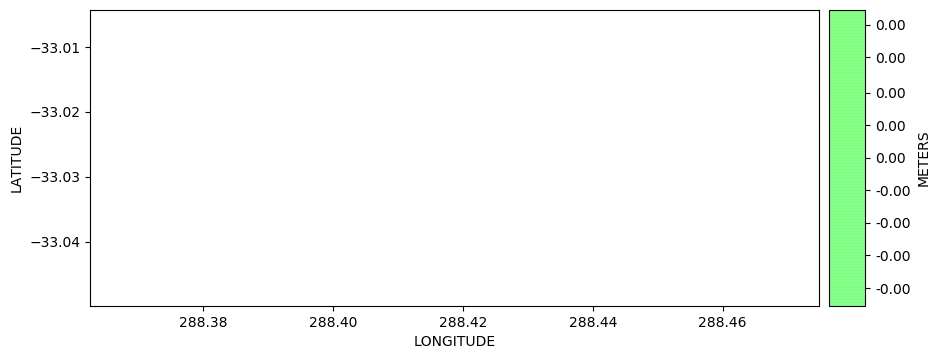

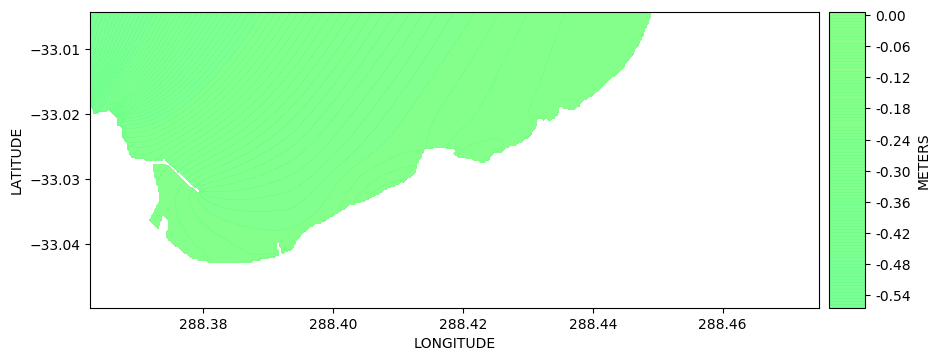

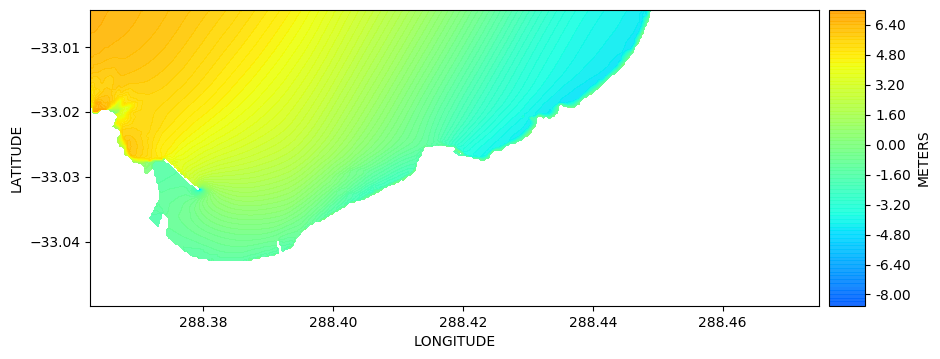

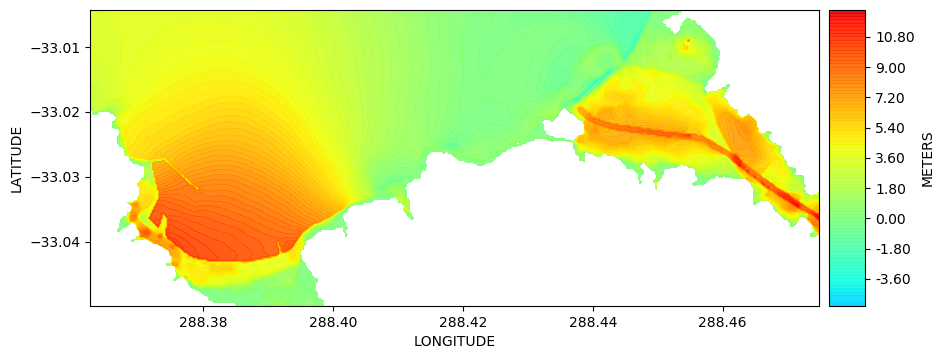

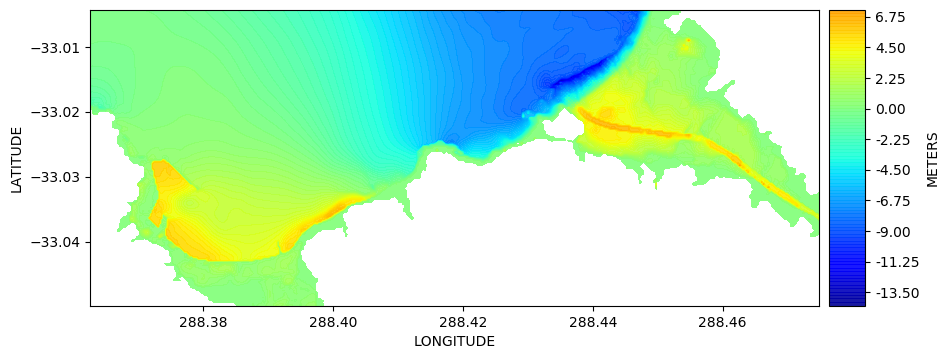

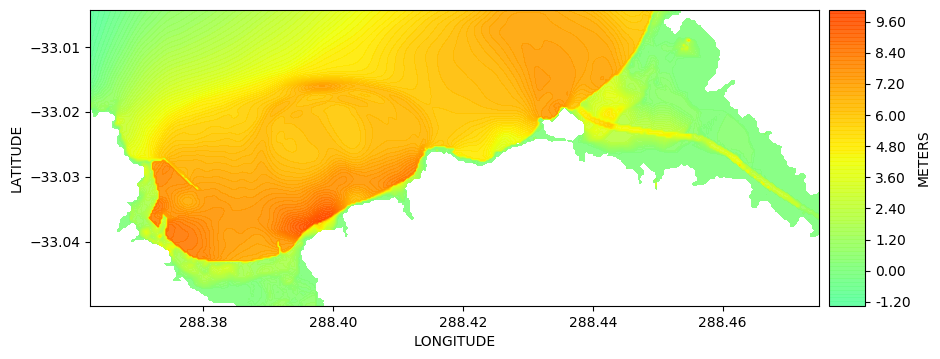

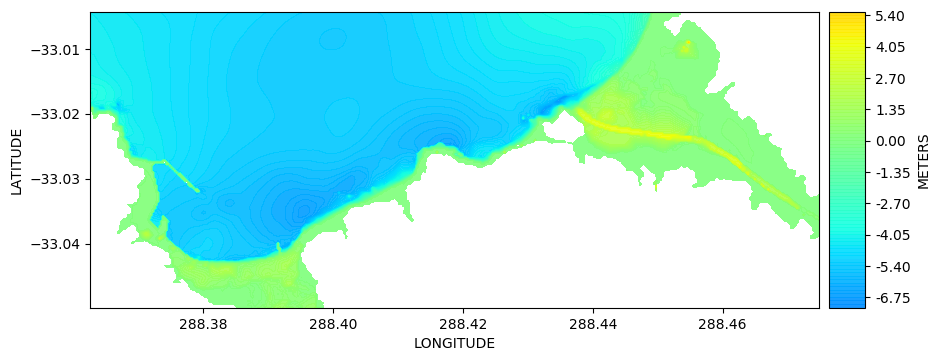

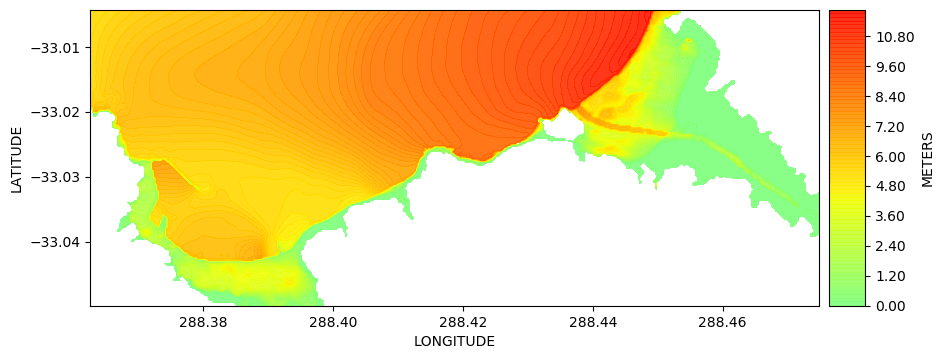

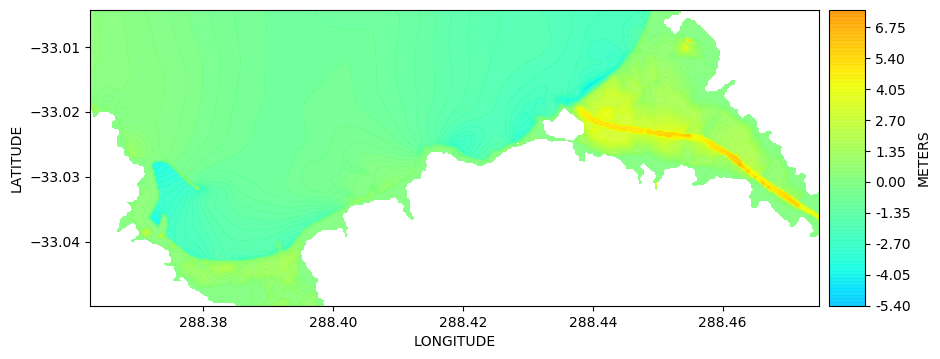

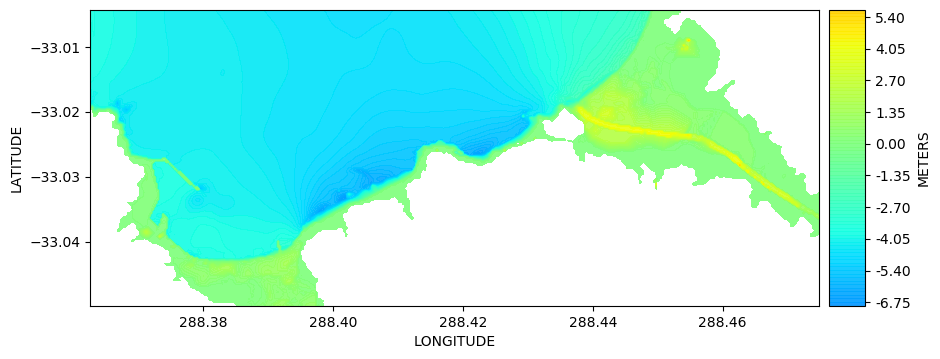

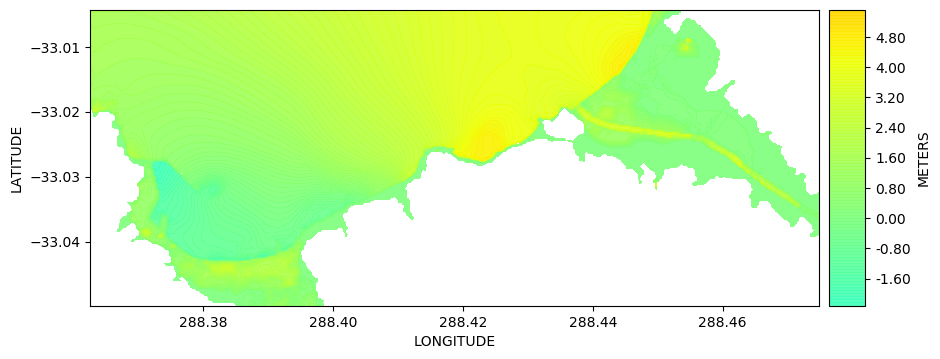

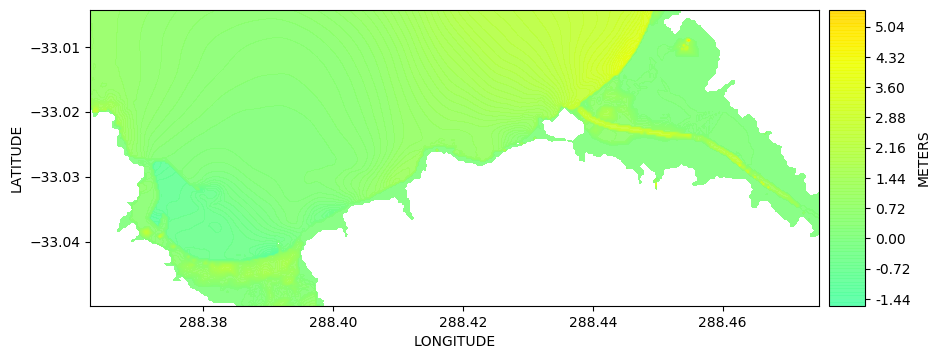

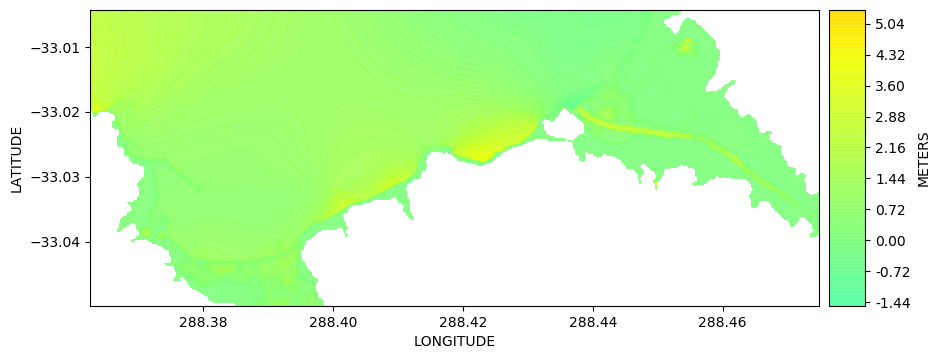

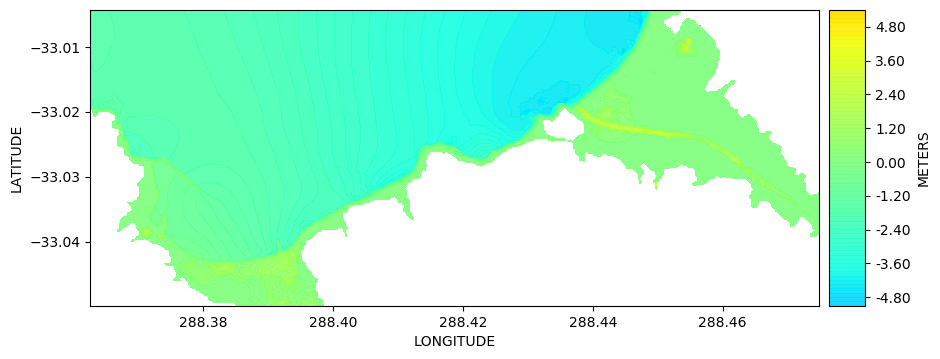

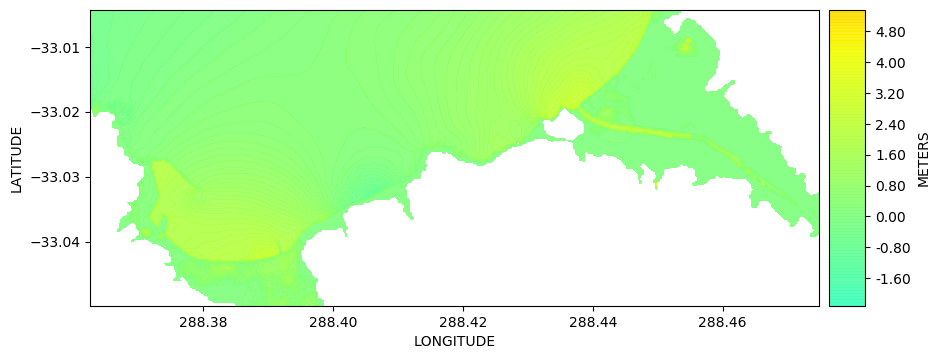

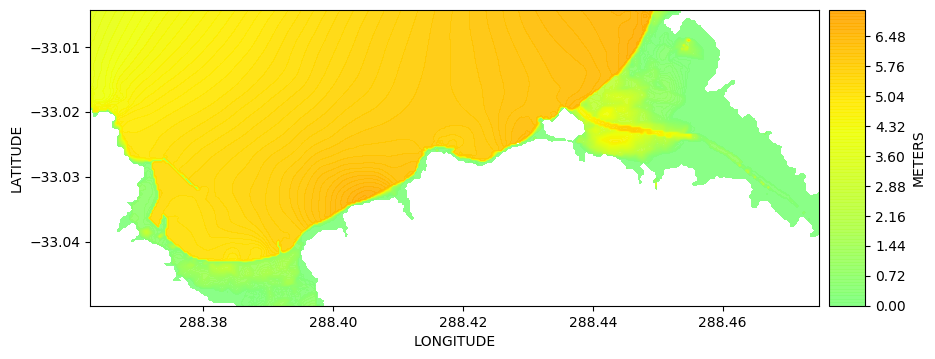

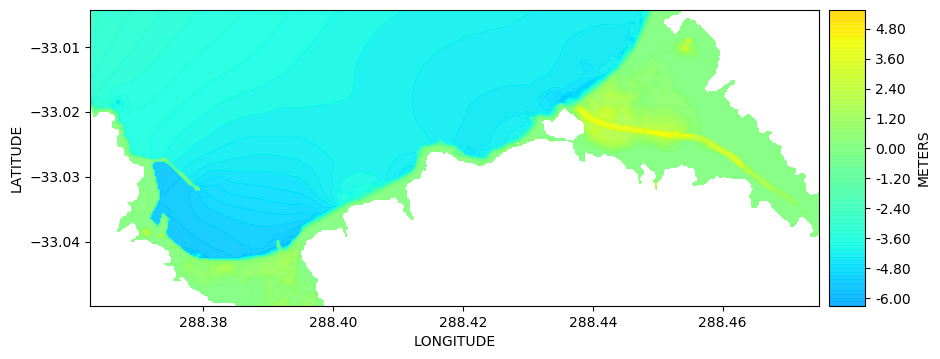

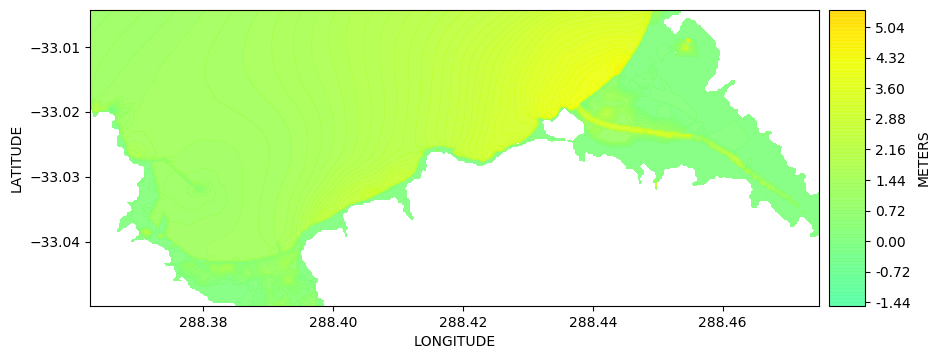

In [6]:
for e in range(len(f.variables['eta'])):
    figure = plt.figure(figsize=(10,8), dpi=100)
    
    eta = f.variables['eta'][e]-f.variables['eta'][0] 
    filtro = eta + f.variables['eta'][0] # lugar que no hay agua
    eta[np.where(eta==0.0)] = np.NaN # altura de agua, falta restarle la topografi
    bat[np.where(bat>0.0)] = np.NaN # topografia
    
    minz=-5
    maxz=20
    curvas=100
    delta = (maxz-minz)/curvas
    contour=np.linspace(minz,maxz,curvas)

    map = figure.add_subplot(111)

    cs = map.contourf(lon,lat,eta,curvas,alpha=.9,cmap=cm.get_cmap('jet'),vmin=-15,vmax=15)
    plt.gca().set_aspect('equal', adjustable='box')

    plt.xlabel('LONGITUDE')
    plt.ylabel('LATITUDE')
    divider = make_axes_locatable(plt.gca())
    cax = divider.append_axes("right", size="5%", pad=0.1)
    cb=figure.colorbar(cs,format='%.2f',cax=cax)
    cb.set_label('METERS')


    figure.savefig(file.split('.nc')[0]+'_cond_ini'+str(e)+'.png',dpi=300,bbox_inches = 'tight',pad_inches = 0)#iter'+str(iteracion)+'.png'

plt.show()